In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
%cd '/gdrive/MyDrive/Bank_app/'

/gdrive/MyDrive/Bank_app


## Mở File

In [ ]:
df_en = pd.read_csv('df_en.csv', encoding='utf-8')
df_en.head()

,Bank,review_text,review_score,english
0,HDBank,Stupid bank app without help on how to generat...,1,1
1,HDBank,High fees. And money sometimes just disappear ...,1,1
2,HDBank,Unable to login by password and unable to logi...,4,1
3,HDBank,"Whenever I choose transfer money option, the a...",3,1
4,HDBank,I can not run this app recently. It crashes al...,3,1


In [ ]:
df_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2696 entries, 0 to 2695
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Bank          2696 non-null   object
 1   review_text   2696 non-null   object
 2   review_score  2696 non-null   int64 
 3   english       2696 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 84.4+ KB


## Xử Lý Văn Bản

In [ ]:
!pip install import-ipynb
import import_ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lib import *

importing Jupyter notebook from lib.ipynb
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 9.6 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=56b9f395233d3f455f6809ba0ac823d8633282c5c4dccc5240ecf17e54d6400b
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


### Gắn nhãn dữ liệu với 2 thang:
- Review_score >= 4: target 1 (Like)
- Review_score <= 3: target 0 (Dislike)

In [ ]:
# phân loại điểm với 2 thang:
df_en['target'] = df_en.review_score.apply(lambda x: 1 if x >= 4 else 0)
df_en.head()

,Bank,review_text,review_score,english,target
0,HDBank,Stupid bank app without help on how to generat...,1,1,0
1,HDBank,High fees. And money sometimes just disappear ...,1,1,0
2,HDBank,Unable to login by password and unable to logi...,4,1,1
3,HDBank,"Whenever I choose transfer money option, the a...",3,1,0
4,HDBank,I can not run this app recently. It crashes al...,3,1,0


In [ ]:
df_en[df_en['target'] != 1].tail()

,Bank,review_text,review_score,english,target
2689,TPBank Mobile,Tp cake,1,1,0
2690,TPBank Mobile,Always clears your login settings such as pass...,1,1,0
2691,TPBank Mobile,Please fix this guys.,1,1,0
2692,TPBank Mobile,Loading loading and login failed,1,1,0
2693,TPBank Mobile,I have tried to approve transaction for 10 tim...,1,1,0


In [ ]:
df_en[['review_text', 'target']].groupby(['target']).count()

,review_text
target,
0,1760
1,936


Nhận xét: Dữ liệu có sự chênh lệch lớn. Có thể cần resample dữ liệu.

In [ ]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 175 kB 18.7 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=9674a49bd265b5f3206b050384095333d022a589d71e0dc0d045d4b74e56e54c
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [ ]:
import emoji

In [ ]:
# xử lý emoticon, emoji, dấu câu, ký tự đặc biệt
df_en.review_text = df_en.review_text.apply(lambda x: emoji.demojize(x))
df_en.review_text = df_en.review_text.apply(lambda x: remove_special_icons(x))
df_en.review_text = df_en.review_text.apply(lambda x: clean_text(x))
df_en.head(10)

,Bank,review_text,review_score,english,target
0,HDBank,stupid bank app without help on how to generat...,1,1,0
1,HDBank,high fees and money sometimes just disappear f...,1,1,0
2,HDBank,unable to login by password and unable to logi...,4,1,1
3,HDBank,whenever i choose transfer money option the ap...,3,1,0
4,HDBank,i can not run this app recently it crashes all...,3,1,0
5,HDBank,can login the internet banking using laptop bu...,1,1,0
6,HDBank,nice and easy to use,5,1,1
7,HDBank,the app is much better now it works well,4,1,1
8,HDBank,app login crash,1,1,0
9,HDBank,dislike these colour,3,1,0


In [ ]:
# loại dữ liệu không có ý nghĩa
print(df_en.shape)
df_en = df_en[df_en.review_text !=  '']
df_en = df_en[df_en.review_text !=  ' ']
print(df_en.shape)

(2696, 5)
(2696, 5)


In [ ]:
df_en.to_csv('processed_en.txt', index = False)

## Feature selection

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# split data to train and test set
x = df_en.review_text
y = df_en.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [ ]:
# create bag of words
vectorizer = TfidfVectorizer(analyzer='word', stop_words='english')
vectorizer.fit(x_train)
x_train = vectorizer.transform(x_train).toarray()

In [ ]:
# sử dụng chi-square statistic để lựa chọn các từ liên quan đến thuộc tính target
from sklearn.feature_selection import chi2

In [ ]:
# tính chi2
chi2, p = chi2(x_train, y_train)

In [ ]:
# chọn p-value để lấy số lượng nhỏ các từ có mối quan hệ đáng kể với biến target
X_names = vectorizer.get_feature_names()
p_value_limit = 0.80
df_features = pd.DataFrame()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df_features = df_features.append(pd.DataFrame({"feature":X_names, "score":1-p}))
df_features = df_features.sort_values(["score"], ascending=False)
df_features = df_features[df_features["score"]>p_value_limit]

X_names = df_features["feature"].unique().tolist()
print("Selected features:", len(df_features))
print("Top features:", ", ".join(df_features["feature"].values[:12]))

Selected features: 181
Top features: great, good, easy, fast, bad, useful, nice, love, convenient, best, tot, perfect


In [ ]:
# save list
with open('selected_features_eng.txt', 'w') as f:
  print(X_names, file=f)

In [ ]:
# áp dụng list từ df_features ở trên để sử dụng cho tf-idf
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
vectorizer2 = TfidfVectorizer(vocabulary = X_names)
vectorizer2.fit(x_train)
x_train = vectorizer2.transform(x_train).toarray()
x_test = vectorizer2.transform(x_test).toarray()
dic_vocabulary = vectorizer2.vocabulary_

## Áp dụng mô hình ML


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, roc_auc_score
import time

In [ ]:
def score_model(model, x_train, x_test, y_train, y_test):
    # print('Applying', model.__class__.__name__)
    start = time.time()
    model.fit(x_train, y_train)
    duration = time.time()-start
    score_test = model.score(x_test, y_test)
    score_f1 = f1_score(y_test, model.predict(x_test))
    auc_roc = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])
    # print('Done', model.__class__.__name__)
    return score_test, score_f1, auc_roc, duration

In [ ]:
models = [LogisticRegression(),
          MultinomialNB(),
          BernoulliNB(),
          KNeighborsClassifier(),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          XGBClassifier(),
          SVC(probability=True)]
scores = []
names = []
for model in models:
    scores.append(score_model(model, x_train, x_test, y_train, y_test))
    names.append(model.__class__.__name__)
results = pd.DataFrame(scores, columns=['Test Accuracy', 'F1 Score', 'AUC-ROC', 'Time Fit'])
results.insert(0, 'Model', pd.Series(names))

In [ ]:
results

,Model,Test Accuracy,F1 Score,AUC-ROC,Time Fit
0,LogisticRegression,0.903585,0.850575,0.930678,0.032928
1,MultinomialNB,0.906057,0.856061,0.927856,0.002571
2,BernoulliNB,0.898640,0.848148,0.926658,0.006108
3,KNeighborsClassifier,0.871446,0.810219,0.915637,0.001049
4,DecisionTreeClassifier,0.875155,0.818671,0.884687,0.113661
5,RandomForestClassifier,0.889988,0.836096,0.929983,0.502399
6,XGBClassifier,0.875155,0.795960,0.918162,0.832518
7,SVC,0.899876,0.849162,0.920968,1.401947


Lựa chọn Logistic Regression (LR) và MultinomialNB vì có Test Accuracy,	F1 Score,	AUC-ROC khá cao nhất

## Logistic Regression 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
lr.score(x_train, y_train)

0.9152093269740329

In [ ]:
lr.score(x_test, y_test)

0.9035846724351051

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       532
           1       0.91      0.80      0.85       277

    accuracy                           0.90       809
   macro avg       0.90      0.88      0.89       809
weighted avg       0.90      0.90      0.90       809



In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[509,  23],
       [ 55, 222]])

In [ ]:
target_names = ['dislike - 0', 'like - 1']

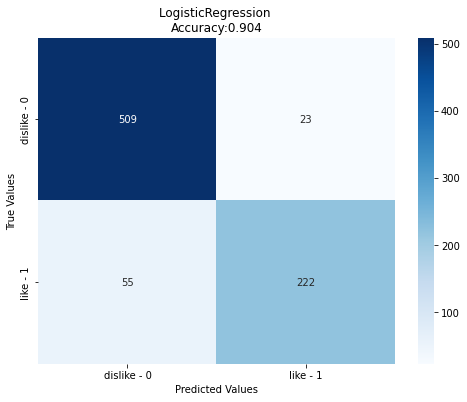

In [ ]:
cm_df = pd.DataFrame(cm,
                      index = target_names,
                      columns = target_names)
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Blues')
plt.title('LogisticRegression \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
y_prob = lr.predict_proba(x_test)
roc = roc_auc_score(y_test, y_prob[:, 1])
roc

0.9306784560679677

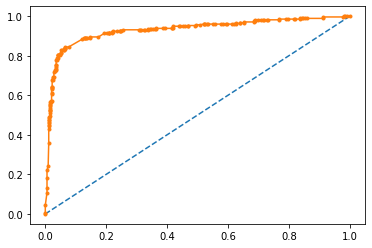

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], linestyle= '--')
ax.plot(fpr, tpr, marker = '.')
plt.show()

# Model dự đoán rất tốt ở class dislike.

## Parameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# parameter tuning
grid_params = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
               'penalty' : ['none', 'l1', 'l2', 'elasticnet'],
               'C': [10, 1.0, 0.1, 0.01]}
 
lr_tun = RandomizedSearchCV(LogisticRegression(), grid_params, scoring='f1_macro', n_jobs=-1)
lr_tun.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver 

RandomizedSearchCV(estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [10, 1.0, 0.1, 0.01],
                                        'penalty': ['none', 'l1', 'l2',
                                                    'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='f1_macro')

In [ ]:
print(lr_tun.best_score_)
print(lr_tun.best_params_)

0.8881613041557287
{'solver': 'lbfgs', 'penalty': 'l2', 'C': 10}


In [ ]:
test_score, f1, aucroc, time_ = score_model(LogisticRegression(C=10, penalty='l2', solver='lbfgs'), x_train, x_test, y_train, y_test)
print('Test score:', test_score)
print('F1 score:', f1)
print('AUC-ROC score:', aucroc)
print('Performance time:', time_)

Test score: 0.9060568603213844
F1 score: 0.8576779026217227
AUC-ROC score: 0.9322120735050622
Performance time: 0.0661008358001709


In [ ]:
lr_tun = LogisticRegression(C=10, penalty='l2', solver='lbfgs')
lr_tun.fit(x_train, y_train)

LogisticRegression(C=10)

In [ ]:
y_pred = lr_tun.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       532
           1       0.89      0.83      0.86       277

    accuracy                           0.91       809
   macro avg       0.90      0.89      0.89       809
weighted avg       0.91      0.91      0.91       809



In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[504,  28],
       [ 48, 229]])

Kết quả có cải thiện nhỏ so với LogisticRegression mặc định

# MultinomialNB

In [ ]:
mnb= MultinomialNB()

In [ ]:
mnb.fit(x_train, y_train)

MultinomialNB()

In [ ]:
y_pred=mnb.predict(x_test)

In [ ]:
mnb.score(x_train, y_train)

0.9183889772125067

In [ ]:
mnb.score(x_test, y_test)

0.9060568603213844

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       532
           1       0.90      0.82      0.86       277

    accuracy                           0.91       809
   macro avg       0.90      0.88      0.89       809
weighted avg       0.91      0.91      0.90       809



In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[507,  25],
       [ 51, 226]])

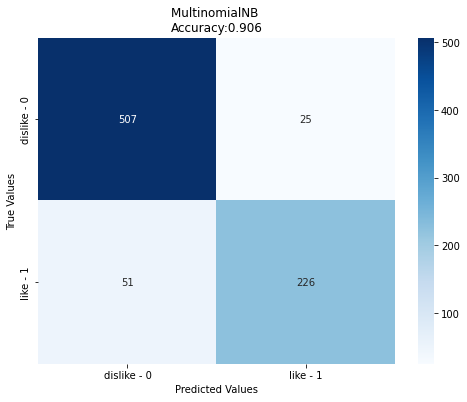

In [ ]:
cm_df = pd.DataFrame(cm,
                      index = target_names,
                      columns = target_names)
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Blues')
plt.title('MultinomialNB \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
y_prob = mnb.predict_proba(x_test)
roc = roc_auc_score(y_test, y_prob[:, 1])
roc

0.9278555142368556

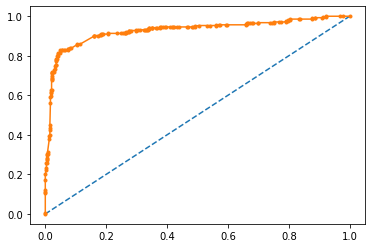

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], linestyle= '--')
ax.plot(fpr, tpr, marker = '.')
plt.show()

Model dự đoán khá tốt

## tuning parameter 

In [ ]:
grid_params = {'alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 10.0, 100]}
 
mt_tun = RandomizedSearchCV(MultinomialNB(), grid_params, scoring='f1_macro', n_jobs=-1, cv = 3)
mt_tun.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


RandomizedSearchCV(cv=3, estimator=MultinomialNB(), n_jobs=-1,
                   param_distributions={'alpha': [0.001, 0.01, 0.1, 0.5, 1.0,
                                                  10.0, 100]},
                   scoring='f1_macro')

In [ ]:
print(mt_tun.best_score_)
print(mt_tun.best_params_)

0.8975654843690785
{'alpha': 0.5}


In [ ]:
mt_tun = MultinomialNB(alpha = 0.5)
mt_tun.fit(x_train, y_train)

MultinomialNB(alpha=0.5)

In [ ]:
y_pred=mt_tun.predict(x_test)

In [ ]:
mt_tun.score(x_train, y_train)

0.9183889772125067

In [ ]:
mt_tun.score(x_test, y_test)

0.9035846724351051

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       532
           1       0.89      0.82      0.85       277

    accuracy                           0.90       809
   macro avg       0.90      0.88      0.89       809
weighted avg       0.90      0.90      0.90       809



In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[504,  28],
       [ 50, 227]])

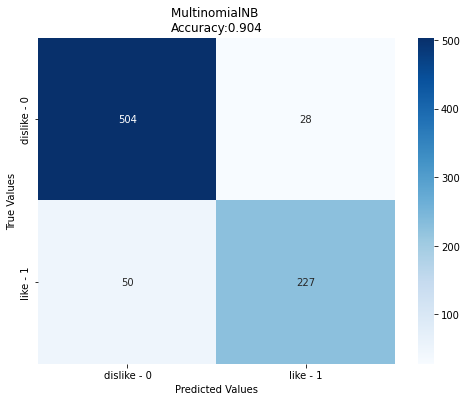

In [ ]:
cm_df = pd.DataFrame(cm,
                      index = target_names,
                      columns = target_names)
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Blues')
plt.title('MultinomialNB \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
y_prob = mnb.predict_proba(x_test)
roc = roc_auc_score(y_test, y_prob[:, 1])
roc

0.9278555142368556

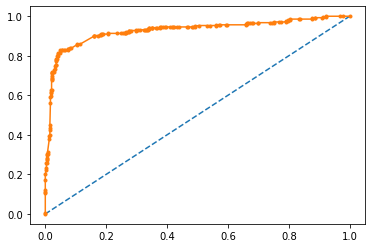

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], linestyle= '--')
ax.plot(fpr, tpr, marker = '.')
plt.show()

Tuning Parameter MultinomialNB không cho kết quả tốt hơn.

# Với dữ liệu gốc thì LogisticRegression(C=10) dự đoán khá tốt.

Vì dữ liệu mất cân bằng, nên thử resample xem liệu kết quả có tốt hơn không.

# Resample data

In [ ]:
from sklearn.utils import resample

In [ ]:
x = df_en.review_text
y = df_en.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [ ]:
data_train, data_test = train_test_split(df_en, test_size = 0.3, random_state = 0)

In [ ]:
data_train.head()

,Bank,review_text,review_score,english,target
1676,F@st Mobile,'error try again later' every single time usel...,1,1,0
684,SHB Mobile Banking,ita helpfull and convenient,3,1,0
300,MB Bank,good app the number one,5,1,1
128,Techcombank Mobile,diggin the new design a world of difference co...,5,1,1
1657,F@st Mobile,easy to use no fees needed for transfering int...,5,1,1


In [ ]:
data_test.head()

,Bank,review_text,review_score,english,target
195,F@st Mobile,i cannot use my fingerprint to login and i can...,1,1,0
2342,VietinBank iPay,secure and mobility,5,1,1
1597,MB Bank,it's ok,5,1,1
2537,SC Mobile Vietnam,can not log in just rotating icon after lunar ...,1,1,0
1457,TPBank Mobile,app tot,5,1,1


In [ ]:
data_train.groupby('target').review_text.count()

target
0    1228
1     659
Name: review_text, dtype: int64

In [ ]:
data_test.groupby('target').review_text.count()

target
0    532
1    277
Name: review_text, dtype: int64

In [ ]:
data_train_0 = data_train[data_train.target == 0]
data_train_1 = data_train[data_train.target == 1]

In [ ]:
data_train_1_resample = resample(data_train_1, 
                           replace = True,
                           n_samples = 1228,
                           random_state = 27)

In [ ]:
data_train_new = pd.concat([data_train_0, data_train_1_resample])

In [ ]:
data_train_new.groupby('target').review_text.count()

target
0    1228
1    1228
Name: review_text, dtype: int64

In [ ]:
data_train.shape, data_train_new.shape

((1887, 5), (2456, 5))

In [ ]:
x_train = data_train_new.review_text
y_train = data_train_new.target

In [ ]:
x_test = data_test.review_text
y_test = data_test.target

In [ ]:
vectorizer3 = TfidfVectorizer(vocabulary = X_names)
vectorizer3.fit(x_train)
x_train = vectorizer3.transform(x_train).toarray()
x_test = vectorizer3.transform(x_test).toarray()
dic_vocabulary = vectorizer3.vocabulary_

In [ ]:
import time

In [ ]:
models = [LogisticRegression(),
          MultinomialNB(),
          BernoulliNB(),
          KNeighborsClassifier(),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          XGBClassifier(),
          SVC(probability=True)]
scores = []
names = []
for model in models:
    scores.append(score_model(model, x_train, x_test, y_train, y_test))
    names.append(model.__class__.__name__)
results = pd.DataFrame(scores, columns=['Test Accuracy', 'F1 Score', 'AUC-ROC', 'Time Fit'])
results.insert(0, 'Model', pd.Series(names))

In [ ]:
results

,Model,Test Accuracy,F1 Score,AUC-ROC,Time Fit
0,LogisticRegression,0.894932,0.842884,0.931449,0.099306
1,MultinomialNB,0.885043,0.834813,0.929070,0.010628
2,BernoulliNB,0.867738,0.822554,0.925246,0.012331
3,KNeighborsClassifier,0.844252,0.782759,0.881019,0.001168
4,DecisionTreeClassifier,0.859085,0.794224,0.871563,0.127579
5,RandomForestClassifier,0.881335,0.823529,0.926777,0.919052
6,XGBClassifier,0.876391,0.801587,0.915889,1.912579
7,SVC,0.893696,0.840741,0.921965,2.497465


Lựa chọn Logistic Regression (LR)

## Logistic Regression 

In [ ]:
lr_re = LogisticRegression()

In [ ]:
lr_re.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred=lr_re.predict(x_test)

In [ ]:
lr_re.score(x_train, y_train)

0.9153094462540716

In [ ]:
lr_re.score(x_test, y_test)

0.8949320148331273

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       532
           1       0.86      0.82      0.84       277

    accuracy                           0.89       809
   macro avg       0.89      0.88      0.88       809
weighted avg       0.89      0.89      0.89       809



In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[496,  36],
       [ 49, 228]])

Kết quả không tốt hơn khi build model với dữ liệu gốc.

# Lựa chọn model LogisticRegression (C = 10) được huấn luyện bởi dữ liệu gốc để dự đoán vì có kết quả dự đoán khá tốt.

In [ ]:
import pickle

In [ ]:
with open('bank_app_LogisticRegression_eng.pkl', mode = 'wb') as pkl:
  pickle.dump(lr_tun, pkl)

In [ ]:
with open('Count_tfidf_eng.pkl', mode = 'wb') as pkl:
  pickle.dump(vectorizer2, pkl)